In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

from google.colab import files
uploaded = files.upload()

# Load the dataset
data = pd.read_csv('house price dataset.csv')

# Creating a binary target variable
median_price = data['SalePrice'].median()
data['HighPriced'] = (data['SalePrice'] > median_price).astype(int)  # 1 if high priced, 0 if low priced

# Selecting the features and the new binary target
X = data[['LotArea']]  # Using LotArea as an example feature
y = data['HighPriced']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating a Logistic Regression model
model = LogisticRegression()

# Fitting the model
model.fit(X_train_scaled, y_train)

# Making predictions
y_pred = model.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the model's performance metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Saving house price dataset.csv to house price dataset.csv
Accuracy: 0.65
Confusion Matrix:
[[115  46]
 [ 57  74]]


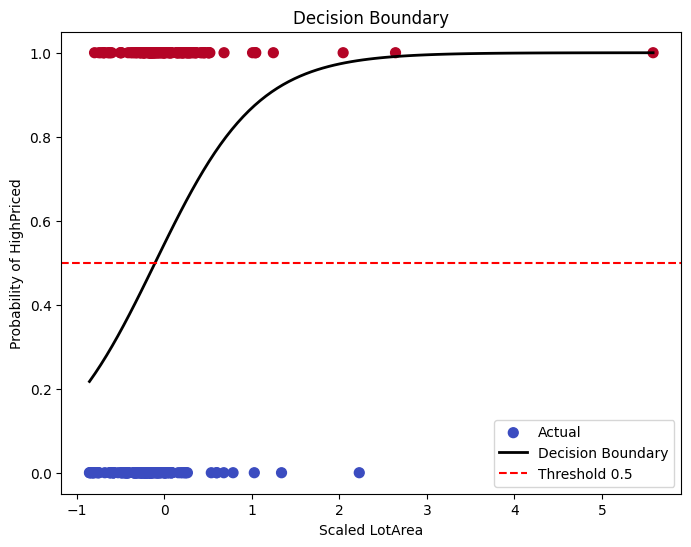

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X_test_scaled, y_test, c=y_test, cmap='coolwarm', s=50, label='Actual')

# Creating a range of values for decision boundary
X_range = np.linspace(X_test_scaled.min(), X_test_scaled.max(), 100).reshape(-1, 1)
decision_boundary = model.predict_proba(X_range)[:, 1]

# Plotting decision boundary
plt.plot(X_range, decision_boundary, color='black', linewidth=2, label='Decision Boundary')

plt.axhline(0.5, color='red', linestyle='--', label='Threshold 0.5')
plt.xlabel('Scaled LotArea')
plt.ylabel('Probability of HighPriced')
plt.title('Decision Boundary')
plt.legend()
plt.show()